# On my honor, as a student, I have neither given nor received unauthorized aid on this academic work.

In [1]:
# Best Top Romance Novels last 10 years   

In [10]:
! pip install requests

In [1]:
# import python packages
import requests
from lxml import html
import csv
import pandas as pd
import re
# import nltk (natural language tool kit), a popular python package for text mining
import nltk
# stopwords, FreqDist, word_tokenize
# currently the data are in list ... convert to string
tokens = str(bookname_ti)
#lowecases
tokens = tokens.lower()
# Remove useless numbers and alphanumerical words
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
#tokenization or word split
tokens = word_tokenize(tokens)
#Remove stopwords
tokens = (word for word in tokens if word not in stopwords.words('english'))
# Filter non-alphanumeric characters from tokens
tokens = (word for word in tokens if word.isalpha())
#remove short words
tokens = (word for word in tokens if len(word) >= 3)
#Create your bigrams ... bigrams are two tokens
#bgs = nltk.bigrams(tokens)
#regular expression
import re
#csv
import csv
# Excel-like format
import pandas as pd
#data visualization
import matplotlib.pyplot as plt
% matplotlib inline
import requests
from lxml import html
import csv
import pandas as pd
from pandas import *
import pylab as plt

In [1]:
# Collect datas 
finaldata = []
a = "http://www.workforce.com/category/main-categories/recruitment/?page="
b = "&q="
count = 1
for i in range(1,15):
    url = '%s%s%s' %(a,count,b)
    print url
    count = count + 1
    data = html.fromstring(requests.get(url).text)
    
    # Xpath
    Burl = data.xpath("//div/div[2]/h3/a/@href")
    Ru = data.xpath("//div/div[2]/div[1]/a/@href")


    
    crawleddata = zip(Burl, Ru)
    
    
    for row in crawleddata:
        finaldata.append(row)    

finaldata = pd.DataFrame(finaldata)     
finaldata.to_csv("data/best_top_books_crawling.csv", encoding="utf-8")

http://www.workforce.com/category/main-categories/recruitment/?page=1&q=


NameError: name 'html' is not defined

In [4]:
# Collect customer review
import requests
finaldata = []
a = "https://www.goodreads.com/list/show/10334._Best_Top_Romance_Novels_of_All_Time?page="
b = "&q="
count = 1
for i in range(1,4):
    url = '%s%s%s' %(a,count,b)
    count = count + 1
    data = html.fromstring(requests.get(url).text)
    
    
    # Xpath
    urll = data.xpath("//tr/td[3]/a/@href")
    for i in urll:
        urll =  "https://www.goodreads.com" +i
       
        
        r = requests.get(urll)
        data = html.fromstring(r.text)
        customer_review = data.xpath("//div[2]/span[1]/span[2]/text()")
        for i in customer_review:
            crawleddata = zip(customer_review, url)
            for row in crawleddata:
                finaldata.append(row)    
finaldata = pd.DataFrame(finaldata)     
finaldata.to_csv("data/customer_review.csv", encoding="utf-8")

In [2]:
# Import python packages
from pattern.en import sentiment
import csv
import pandas as pd

import re

import nltk
from nltk.corpus import stopwords

# 1. Customer reviews analysis, using sentiment analysis

In [8]:
# Load customer_review data
reviews = []
openfile = open('data/customer_review.csv', 'rb')
r = csv.reader(openfile)
for i in r:
    reviews.append(i)  
openfile.close()

score=[]
for row in reviews:
    score.append(sentiment(row[0]))

output=zip(score)
writer = csv.writer(open('data/HW_output_sentiscore.csv', 'wb'))
writer.writerows(output)


- Since The customer reviews has a bunch of data, it will take a lot of time to run. It couldn't run fast on my computer, but the customers_review data collect and also save to csv.

In [ ]:
#remove extra brackets
reviews = [x for y in reviews for x in y]
# Remove useless numbers and alphanumerical words
documents = [re.sub("[^a-zA-Z]+", " ", document) for document in reviews]
# tokenize
texts = [[word for word in document.lower().split() ] for document in documents]
# remove common words 
stoplist = stopwords.words('english')
texts = [[word for word in text if word not in stoplist] for text in texts]
#remove short words
texts = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]

for row in texts:
    data = row[0]
    score = sentiment(data)
    
    

In [4]:
texts = []
openfile = open('data/data\HW_output_sentiscore.csv', 'rb')
r = csv.reader(openfile)
for i in r:
    texts.append(i)  
openfile.close()


positive_review = []
negative_review = []
neutral_review = []

for row in texts:
    data = row[0]
    score = sentiment(data)
    if score[0] > 0:
        positive_review.append(data)
    elif score[0] == 0:
        neutral_review.append(data)
    else:
        negative_review.append(data)

In [5]:
print len(positive_review)
print len(negative_review)
print len(neutral_review)

0
0
1048576


In [7]:
import collections
from collections import Counter

# positive review
texts = [[word for word in text if word not in stoplist] for text in positive_review]
#remove short words
texts = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]
texts
# remove extra brackets
cleaned_positive_review_tokens = [x for y in texts for x in y]
cleaned_positive_review_tokens
# word frequency on positive reviews
positive_review_wordcounts= Counter(cleaned_positive_review_tokens)
positive_review_wordcounts.most_common()

[]

- The patten is not a good way to do sentiment in this data analysis

# 2. DataFrame

In [5]:
# Read data
bestbook = []
openfile = open('data/best_top_books_crawling.csv', 'rb')
r = csv.reader(openfile)
for i in r:
# get the first column only (ignoring the second column)
    bestbook.append(i)    
openfile.close()


In [6]:
# remove non-relavant column and rows
bestbook = pd.DataFrame(bestbook)
bestbook = bestbook.rename(columns={0: 'Rating', 1: 'Bookname', 2: 'Authorname', 3: 'Aver_Rating', 4: 'Score', 5: 'url'})
bestbook = bestbook.iloc[1:]
# bestbook = bestbook.drop('Number', axis = 1)
bestbook['freq'] = bestbook.groupby('Authorname')['Authorname'].transform('count')
bestbook.head()

,Rating,Bookname,Authorname,Aver_Rating,Score,url,freq
1,0,Pride and Prejudice,Jane Austen,4.24,"32,676",/book/show/1885.Pride_and_Prejudice,4
2,1,"Outlander (Outlander, #1)",Diana Gabaldon,4.21,"21,710",/book/show/10964.Outlander,4
3,2,Jane Eyre,Charlotte Brontë,4.10,"15,893",/book/show/10210.Jane_Eyre,1
4,3,Gone with the Wind,Margaret Mitchell,4.28,"10,438",/book/show/18405.Gone_with_the_Wind,1
5,4,Sense and Sensibility,Jane Austen,4.06,"10,240",/book/show/14935.Sense_and_Sensibility,4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1147a5210>]], dtype=object)

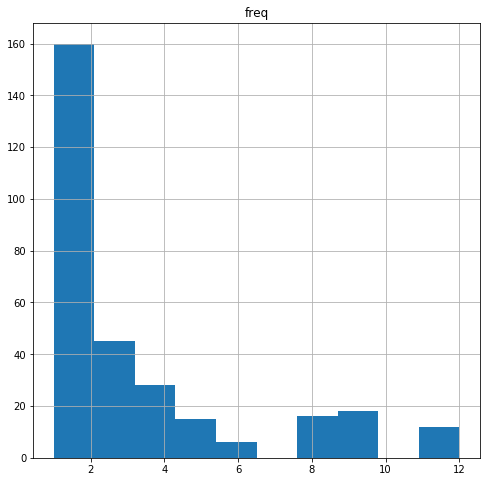

In [108]:
bestbook.hist(figsize=(8,8))

In [109]:
bestbook.describe()
bestbook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 1 to 300
Data columns (total 7 columns):
Rating         300 non-null object
Bookname       300 non-null object
Authorname     300 non-null object
Aver_Rating    300 non-null object
Score          300 non-null object
url            300 non-null object
freq           300 non-null int64
dtypes: int64(1), object(6)
memory usage: 16.5+ KB


In [28]:
# check missing values
bestbook.isnull().sum()

Rating         0
Bookname       0
Authorname     0
Aver_Rating    0
Score          0
url            0
freq           0
dtype: int64

In [29]:
# Change the dtype of Aver_Rating from object to float
bestbook['Aver_Rating'] = bestbook['Aver_Rating'].astype(float)

# 3. Analysis data

In [ ]:
# Best Author and the rrequence they have showed up
bestauthor = bestbook.Authorname.value_counts()
bestauthor = pd.DataFrame(bestauthor)
bestauthor.head()


- Even though the author are all popular, but these author has more books are listed as the best books.
- For busines, The books sellers can have more these authors'books in stores. It has more possibilities to sell well.

In [22]:
# aver_rating over 4.5 points
H_point = bestbook[(bestbook['Aver_Rating']> 4.5)]
H_point

,Rating,Bookname,Authorname,Aver_Rating,Score,url,freq
166,165,Fruits Basket: The Complete Collection,Natsuki Takaya,4.53,197,/book/show/8192675-fruits-basket,1
237,236,Surrender the Wind,Elizabeth St. Michel,4.62,100,/book/show/30643163-surrender-the-wind,3
259,258,Sweet Vengeance: Duke of Rutland Series Book 1,Elizabeth St. Michel,5.00,98,/book/show/36052454-sweet-vengeance,3
267,266,"Vampire Academy Box Set (Vampire Academy, #1-4)",Richelle Mead,4.57,96,/book/show/8718952-vampire-academy-box-set,1
278,277,Waking the Witch,Lisa Whitefern,4.54,94,/book/show/6079129-waking-the-witch,1


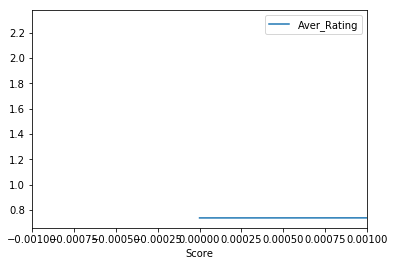

In [23]:
plt.figure()
df3= DataFrame(np.random.randn(1000, 2), columns=['Aver_Rating', 'Score']).cumsum()
df3['Score'] = Series(range(len(H_point)))

df3.plot(x='Score', y='Aver_Rating')

# 4. Word freqency - Which themes are more attractable base on the book name

In [7]:
# frequent word for books name.

finaldata = []
a = "https://www.goodreads.com/list/show/10334._Best_Top_Romance_Novels_of_All_Time?page="
b = "&q="
count = 1
for i in range(1,4):
    url = '%s%s%s' %(a,count,b)
    print url
    count = count + 1
    data = html.fromstring(requests.get(url).text)
    
    # Xpath 
    title = data.xpath("//td/a[@class = 'bookTitle']/span[@itemprop = 'name']/text()") 
        
    for row in title:
        finaldata.append(row)    

finaldata = pd.DataFrame(finaldata)     
finaldata.to_csv("data/book_name.csv", encoding="utf-8")
 

https://www.goodreads.com/list/show/10334._Best_Top_Romance_Novels_of_All_Time?page=1&q=
https://www.goodreads.com/list/show/10334._Best_Top_Romance_Novels_of_All_Time?page=2&q=
https://www.goodreads.com/list/show/10334._Best_Top_Romance_Novels_of_All_Time?page=3&q=


In [141]:
bookname_ti = []
openfile = open("data/book_name.csv", "rb")
r = csv.reader(openfile)
bookname_ti = []
for i in r:
    bookname_ti.append(i)
openfile.close()
for i in bookname_ti:
    print i
bookname = [x for y in bookname_ti for x in y]
len(bookname)

['Pride and Prejudice']
['Outlander (Outlander, #1)']
['Jane Eyre']
['Gone with the Wind']
['Sense and Sensibility']
['The Notebook (The Notebook, #1)']
['Dragonfly in Amber (Outlander, #2)']
['Voyager (Outlander, #3)']
['Whitney, My Love (Westmoreland, #2)']
['A Kingdom of Dreams (Westmoreland, #1)']
['Persuasion']
['After Forever Ends']
['Almost Heaven (Sequels, #3)']
['A Knight in Shining Armor']
['Lord of Scoundrels (Scoundrels, #3)']
['Paradise (Second Opportunities, #1)']
["The Bride (Lairds' Fianc\xcc\xa9es, #1)"]
['The Princess Bride']
["Nobody's Baby But Mine (Chicago Stars, #3)"]
['Flowers from the Storm']
['Devil in Winter (Wallflowers, #3)']
['Lover Awakened (Black Dagger Brotherhood, #3)']
['Once and Always (Sequels, #1)']
["The Secret (Highlands' Lairds #1)"]
['Kiss an Angel']
['Dreaming of You (The Gamblers, #2)']
['The Bronze Horseman (The Bronze Horseman, #1)']
["Honor's Splendour"]
['Lover Eternal (Black Dagger Brotherhood, #2)']
['The Duke and I (Bridgertons, #1)']
[

300

In [142]:
# currently the data are in list ... convert to string
tokens = str(bookname_ti)
#lowecases
tokens = tokens.lower()
# Remove useless numbers and alphanumerical words
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
#tokenization or word split
tokens = word_tokenize(tokens)
#Remove stopwords
tokens = (word for word in tokens if word not in stopwords.words('english'))
# Filter non-alphanumeric characters from tokens
tokens = (word for word in tokens if word.isalpha())
#remove short words
tokens = (word for word in tokens if len(word) >= 3)
#Create your bigrams ... bigrams are two tokens
#bgs = nltk.bigrams(tokens)

In [143]:
fdist = nltk.FreqDist(tokens)
print fdist

<FreqDist with 591 samples and 902 outcomes>


In [144]:
fdist.most_common(50)

[('love', 12),
 ('trilogy', 10),
 ('black', 8),
 ('mackenzie', 8),
 ('family', 7),
 ('born', 6),
 ('shades', 5),
 ('heart', 5),
 ('perfect', 5),
 ('eyes', 5),
 ('saga', 5),
 ('outlander', 5),
 ('wallflowers', 5),
 ('prince', 5),
 ('rose', 5),
 ('hathaways', 4),
 ('lord', 4),
 ('chicago', 4),
 ('french', 4),
 ('green', 4),
 ('dream', 4),
 ('kiss', 4),
 ('queen', 4),
 ('fifty', 4),
 ('comanche', 4),
 ('devil', 4),
 ('slammed', 4),
 ('xcc', 4),
 ('dark', 4),
 ('night', 4),
 ('anne', 4),
 ('duke', 4),
 ('stars', 4),
 ('bridgertons', 4),
 ('brothers', 4),
 ('lairds', 4),
 ('heaven', 3),
 ('team', 3),
 ('blue', 3),
 ('darkness', 3),
 ('carsington', 3),
 ('westmoreland', 3),
 ('winter', 3),
 ('man', 3),
 ('remember', 3),
 ('twilight', 3),
 ('one', 3),
 ('horseman', 3),
 ('bride', 3),
 ('jewels', 3)]

In [146]:
# prepare the results of word frequency on auto data as a list

freq_word = []

# two values or columns in f_positive
for k,v in fdist.items():
    freq_word.append([k,v])

#make it like an Excel worksheet
wordlist = pd.DataFrame(freq_word)
wordlist = wordlist.rename(columns={0: 'word', 1: 'freq'})
# popular words
wp = wordlist.sort_values('freq', ascending=False)
wp.to_csv("data/bookname_freq.csv")
# count positive wordlist
print len(wp)
wp.head(10)


591


,word,freq
77,love,12
389,trilogy,10
553,mackenzie,8
319,black,8
78,family,7
488,born,6
73,shades,5
164,perfect,5
376,outlander,5
265,eyes,5


# 5. Word Cloud

In [152]:
# The most popular theme of these best romance books
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

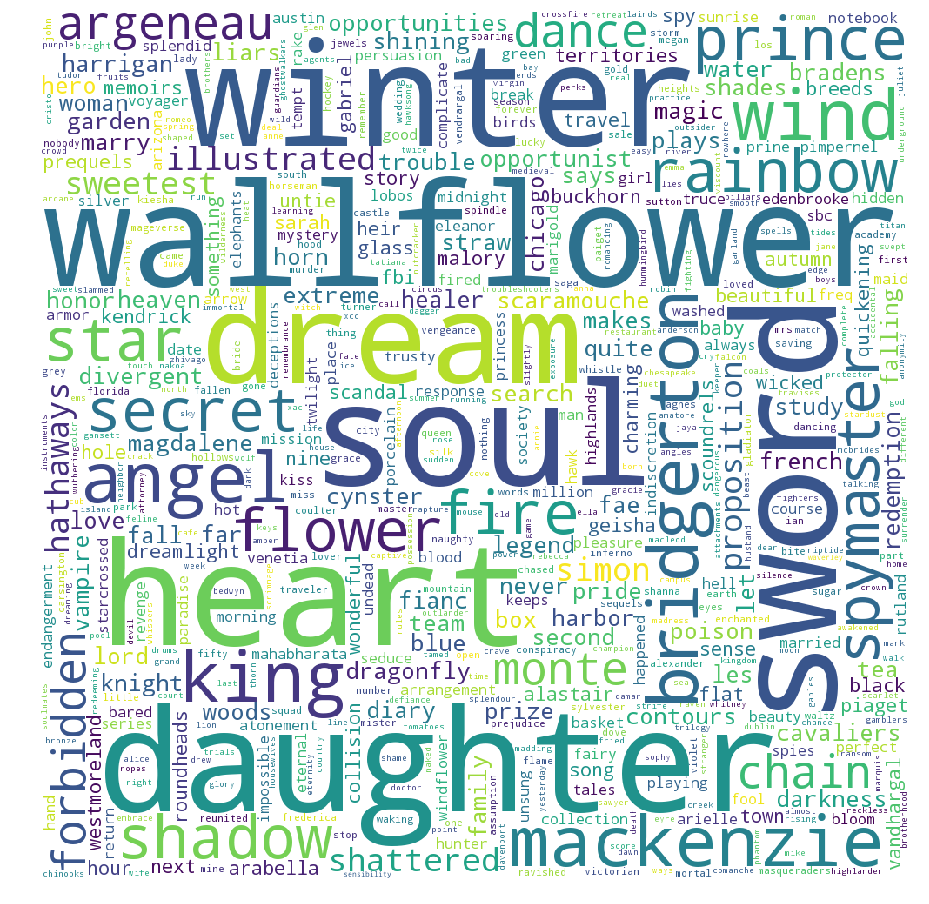

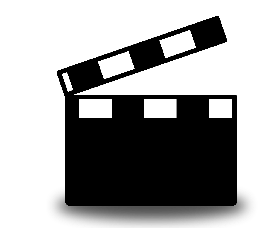

In [151]:

d = path.dirname("data/")
# Read the whole text.
text = open(path.join(d,'bookname_freq.txt')).read()
#additional stopwrods
stopwords = set(STOPWORDS)
stopwords.add("book")
stopwords.add("books")
stopwords.add("word")
stopwords.add("read")
stopwords.add("see")
stopwords.add("look")
# read the mask image

movie_mask = np.array(Image.open(path.join(d, "movie.png")))

wc = WordCloud(background_color="white", max_words=2000, mask=movie_mask,
               stopwords=stopwords)
# generate word cloud
wc.generate(text)

# show
plt.figure(figsize=(16,16))
plt.imshow(wc)
plt.axis("off")

plt.figure()
plt.imshow(movie_mask, cmap=plt.cm.gray)
plt.axis("off")
plt.savefig("movie_mask")
plt.savefig("data/movie.pdf")

- The contents are more about a big family and talk about the daughters and the love with price, king and heros
- There always have  trilogy or more for that family
- There also talk much about sword. the love in war is always touching.
- For business, the bookstores can purchase more romance books have all these features.

# Referrences

- https://www.goodreads.com/list/show/10334._Best_Top_Romance_Novels_of_All_Time

- https://stackoverflow.com/questions/22391433/count-the-frequency-that-a-value-occurs-in-a-dataframe-column

- https://stackoverflow.com/questions/37333165/plot-specific-rows-of-a-pandas-dataframe